In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
data=pd.read_csv("C:/Users/CTS/Documents/Dataset/incomestmt.csv")

In [ ]:
#understanding data
data.head()

,stock,endDate,netIncomeApplicableToCommonShares,netIncomeFromContinuingOps,totalOtherIncomeExpenseNet,costOfRevenue,totalOperatingExpenses,totalRevenue,incomeTaxExpense,interestExpense,operatingIncome,ebit,grossProfit,sellingGeneralAdministrative,netIncome,incomeBeforeTax,researchDevelopment,otherOperatingExpenses,minorityInterest,discontinuedOperations
0,IVC,12/31/2019,-53327000,-53327000,-46109000,665897000.0,9.258800e+08,9.279640e+08,9302000,-29076000.0,2084000,2084000,262067000,259983000.0,-53327000,-44025000,NaN,NaN,NaN,NaN
1,IVC,12/31/2018,-43922000,-43922000,-19722000,704671000.0,9.867270e+08,9.723470e+08,9820000,-28336000.0,-14380000,-14380000,267676000,282056000.0,-43922000,-34102000,NaN,NaN,NaN,NaN
2,IVC,12/31/2017,-76541000,-76541000,-38763000,697246000.0,9.939840e+08,9.664970e+08,10291000,-22907000.0,-27487000,-27487000,269251000,296738000.0,-76541000,-66250000,NaN,NaN,NaN,NaN
3,IVC,12/31/2016,-42856000,-42856000,-9208000,763847000.0,1.067823e+09,1.047474e+09,13299000,-15875000.0,-20349000,-20349000,283627000,303976000.0,-42856000,-29557000,NaN,NaN,NaN,NaN
4,CSLT,12/31/2019,-40002000,-40002000,1336000,59074000.0,1.846460e+08,1.433080e+08,0,NaN,-41338000,-41338000,84234000,66578000.0,-40002000,-40002000,58994000.0,NaN,NaN,NaN


In [ ]:
data.tail()

,stock,endDate,netIncomeApplicableToCommonShares,netIncomeFromContinuingOps,totalOtherIncomeExpenseNet,costOfRevenue,totalOperatingExpenses,totalRevenue,incomeTaxExpense,interestExpense,operatingIncome,ebit,grossProfit,sellingGeneralAdministrative,netIncome,incomeBeforeTax,researchDevelopment,otherOperatingExpenses,minorityInterest,discontinuedOperations
494,EXPO,12/28/2018,72254000,72254000,1861000,215052000.0,263183000.0,354639000.0,21063000,NaN,91456000,91456000,139587000,17532000.0,72254000,93317000,NaN,30599000.0,NaN,NaN
495,EXPO,12/29/2017,41305000,41305000,10458000,210289000.0,257613000.0,329664000.0,41204000,NaN,72051000,72051000,119375000,17780000.0,41305000,82509000,NaN,29544000.0,NaN,NaN
496,EXPO,12/30/2016,47480000,47480000,7211000,193397000.0,237286000.0,299197000.0,21642000,NaN,61911000,61911000,105800000,21970000.0,47480000,69122000,NaN,21919000.0,NaN,NaN
497,MDLY,12/31/2019,-3529000,-16770000,-20948000,27367000.0,39953000.0,48841000.0,4710000,-11497000.0,8888000,8888000,21474000,12586000.0,-3379000,-12060000,NaN,NaN,-109714000.0,NaN
498,MDLY,12/31/2018,-3629000,-21526000,-33275000,28936000.0,44502000.0,56509000.0,258000,-10806000.0,12007000,12007000,27573000,15566000.0,-2432000,-21268000,NaN,NaN,-75403000.0,NaN


In [ ]:
data.describe()

,netIncomeApplicableToCommonShares,netIncomeFromContinuingOps,totalOtherIncomeExpenseNet,costOfRevenue,totalOperatingExpenses,totalRevenue,incomeTaxExpense,interestExpense,operatingIncome,ebit,grossProfit,sellingGeneralAdministrative,netIncome,incomeBeforeTax,researchDevelopment,otherOperatingExpenses,minorityInterest,discontinuedOperations
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,3.540000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.910000e+02,4.990000e+02,4.990000e+02,1.540000e+02,1.430000e+02,1.340000e+02,3.600000e+01
mean,2.504458e+08,2.668337e+08,-8.408956e+07,4.840350e+09,5.649567e+09,6.077227e+09,7.684280e+07,-7.824264e+07,4.276607e+08,3.897468e+08,1.236878e+09,7.122355e+08,2.518849e+08,3.436765e+08,7.962123e+07,6.083039e+07,9.431751e+08,1.261692e+08
std,1.237964e+09,1.276729e+09,4.805446e+08,2.053589e+10,2.332205e+10,2.479180e+10,4.135712e+08,1.982832e+08,1.709161e+09,1.693084e+09,4.889326e+09,3.054180e+09,1.238007e+09,1.631033e+09,1.730963e+08,2.681020e+08,2.988177e+09,4.305958e+08
min,-6.942500e+09,-6.632800e+09,-8.872700e+09,0.000000e+00,-2.731784e+06,-1.367030e+08,-1.515000e+09,-1.704000e+09,-3.445709e+09,-3.445709e+09,-2.259900e+08,-2.731784e+06,-6.942500e+09,-7.991700e+09,3.017760e+05,-1.694150e+08,-1.317000e+08,-1.161000e+09
25%,-1.708650e+07,-1.514384e+07,-3.865800e+07,0.000000e+00,4.291150e+07,3.733214e+07,0.000000e+00,-5.099450e+07,-8.425000e+06,-8.267500e+06,1.864200e+07,1.569150e+07,-1.514384e+07,-1.757550e+07,8.117610e+06,1.190000e+05,5.414750e+06,-1.790250e+07
50%,8.384000e+06,1.080700e+07,-3.724000e+06,7.362500e+07,1.953980e+08,2.457490e+08,5.790000e+05,-1.134700e+07,1.912100e+07,5.624630e+05,1.320440e+08,5.650100e+07,9.228000e+06,1.069300e+07,2.614050e+07,5.626000e+06,2.635000e+07,1.455000e+05
75%,1.041255e+08,1.043165e+08,0.000000e+00,5.636240e+08,1.053302e+09,1.111286e+09,1.624400e+07,-9.954062e+05,1.629865e+08,1.223810e+08,5.175375e+08,2.929520e+08,1.043165e+08,1.214370e+08,7.147125e+07,2.088050e+07,2.976742e+08,4.397500e+07
max,1.383900e+10,1.423900e+10,1.240824e+09,1.845570e+11,2.224700e+11,2.421550e+11,4.790000e+09,-1.600000e+01,1.968500e+10,1.968500e+10,5.759800e+10,3.519300e+10,1.383900e+10,1.798100e+10,1.534863e+09,2.255826e+09,1.969488e+10,1.142000e+09


In [ ]:
data.shape

(499, 20)

In [ ]:
data.columns

Index(['stock', 'endDate', 'netIncomeApplicableToCommonShares',
       'netIncomeFromContinuingOps', 'totalOtherIncomeExpenseNet',
       'costOfRevenue', 'totalOperatingExpenses', 'totalRevenue',
       'incomeTaxExpense', 'interestExpense', 'operatingIncome', 'ebit',
       'grossProfit', 'sellingGeneralAdministrative', 'netIncome',
       'incomeBeforeTax', 'researchDevelopment', 'otherOperatingExpenses',
       'minorityInterest', 'discontinuedOperations'],
      dtype='object')

In [ ]:
data.isnull().sum()

stock                                  0
endDate                                0
netIncomeApplicableToCommonShares      0
netIncomeFromContinuingOps             0
totalOtherIncomeExpenseNet             0
costOfRevenue                          0
totalOperatingExpenses                 0
totalRevenue                           0
incomeTaxExpense                       0
interestExpense                      145
operatingIncome                        0
ebit                                   0
grossProfit                            0
sellingGeneralAdministrative           8
netIncome                              0
incomeBeforeTax                        0
researchDevelopment                  345
otherOperatingExpenses               356
minorityInterest                     365
discontinuedOperations               463
dtype: int64

In [ ]:
#measures of frequency
# Calculate the number of occurrences of each value in a column
value_counts = data['stock'].value_counts()
print(value_counts)

IVC     4
BKYI    4
RPAI    4
COUP    4
PLUG    4
       ..
CSPR    3
ETNB    2
MDLY    2
ACTT    1
TMBR    1
Name: stock, Length: 129, dtype: int64


In [ ]:
# Calculate the percentage of occurrences of each value in a column
value_counts_pct = data['stock'].value_counts(normalize=True) * 100
print(value_counts_pct)

IVC     0.801603
BKYI    0.801603
RPAI    0.801603
COUP    0.801603
PLUG    0.801603
          ...   
CSPR    0.601202
ETNB    0.400802
MDLY    0.400802
ACTT    0.200401
TMBR    0.200401
Name: stock, Length: 129, dtype: float64


In [ ]:
# Calculate the total count of values in a column
count = data['stock'].count()
print(count)


499


In [ ]:
#measures of central tendency
# Calculate the mean of a numerical column
mean = data['totalRevenue'].mean()
print(mean)

6077227249.468938


In [ ]:
# Calculate the median of a numerical column
median =data['totalRevenue'] .median()
print(median)

245749032.0


In [ ]:
# Calculate the mode of a column
mode = data['totalRevenue'].mode()
print(mode)

0    0.0
Name: totalRevenue, dtype: float64


In [ ]:
# Calculate the geometric mean of a numerical column
geometric_mean = stats.gmean(data['totalRevenue'])
print(geometric_mean)

nan


C:\Users\CTS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:267: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


In [ ]:
#measures of dispersion
# Calculate the range of a numerical column
range = data['totalRevenue'].max() - data['totalRevenue'].min()
print(range)

242291703000.0


In [ ]:
# Calculate the variance of a numerical column
variance = np.var(data['totalRevenue'])
print(variance)

6.134017971262836e+20


In [ ]:
# Calculate the standard deviation of a numerical column
std_dev = np.std(data['totalRevenue'])
print(std_dev)

24766949693.61959


In [ ]:
# Calculate the coefficient of variation of a numerical column
coefficient_variation = std_dev / np.mean(data['totalRevenue'])
print(coefficient_variation)

4.075370012826798


In [ ]:
# Calculate the interquartile range of a numerical column
Q1 = data['totalRevenue'].quantile(0.25)
Q3 = data['totalRevenue'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1073954358.0


In [ ]:
#measures of position
# Calculate the percentile rank of a value in a numerical column
value = 100
percentile_rank = stats.percentileofscore(data['totalRevenue'], value)
print(percentile_rank)

8.216432865731463


In [ ]:
# Calculate the z-score of a value in a numerical column
value = 100
z_score = (value - data['totalRevenue'].mean()) / data['totalRevenue'].std()
print(z_score)

-0.245130497083629


In [ ]:
# Calculate the quartile rank of a value in a numerical column
value = 100
quartile_rank = pd.qcut(data['totalRevenue'], 4, labels=False)
print(quartile_rank)

0      2
1      2
2      2
3      2
4      1
      ..
494    2
495    2
496    2
497    1
498    1
Name: totalRevenue, Length: 499, dtype: int64


In [ ]:
# Calculate the decile rank of a value in a numerical column
value = 100
decile_rank = pd.qcut(data['totalRevenue'], 10, labels=False)
print(decile_rank)

0      7
1      7
2      7
3      7
4      4
      ..
494    5
495    5
496    5
497    2
498    2
Name: totalRevenue, Length: 499, dtype: int64


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(data['totalRevenue'], data['incomeTaxExpense'])
print(contingency_table)

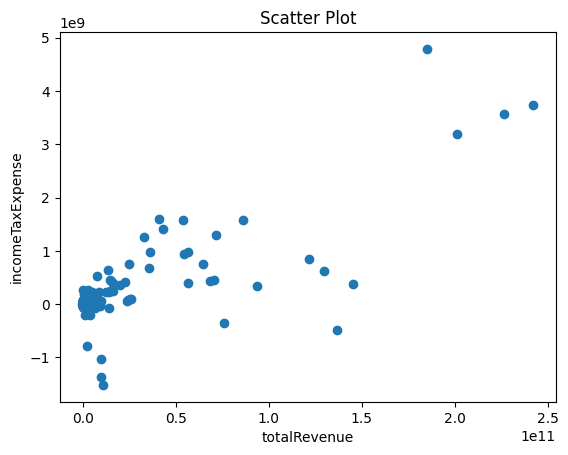

In [ ]:
# Create a scatter plot
plt.scatter(data['totalRevenue'], data['incomeTaxExpense'])
plt.title('Scatter Plot')
plt.xlabel('totalRevenue')
plt.ylabel('incomeTaxExpense')
plt.show()

In [ ]:

# define the base figure (e.g. total revenue)
base_figure = data['totalRevenue'].sum()



In [ ]:
vert=(data['totalRevenue']/base_figure)*100
print(vert)



0      0.030600
1      0.032064
2      0.031871
3      0.034541
4      0.004726
         ...   
494    0.011694
495    0.010871
496    0.009866
497    0.001611
498    0.001863
Name: totalRevenue, Length: 499, dtype: float64
